## Problem Statement


You are a data scientist working for a sports analytics company. The dataset, named **"sports_league_data.csv"** includes a variety of attributes for players in the league. The columns in the dataset are as follows:

- **player_id:** A unique identifier for each player.
- **age:** Age of the player.
- **position:** The position the player typically plays in (e.g., Forward, Midfielder, Defender, Goalkeeper).
- **team:** The team the player belongs to.
- **games_played:** The total number of games played by the player in the season.
- **player_rating:** An overall performance rating for the player for the season.

In [12]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 


**Import Necessary Libraries**

In [13]:
# Pandas display option for cleaner visibility 
pd.set_option("display.max_columns",None)
pd.set_option("display.width",120)

In [14]:
#Loading the dataset 
path = "sports_league_data.csv"
df = pd.read_csv(path)


## Task1

1. Import the data from the "sports_league_data.csv" file.
2. display the number of rows and columns. 
3. Display the first few rows of the dataset to get an overview.


In [15]:
# number of rows and columns 
n_rows,n_column = df.shape
print(f"shape:{n_rows} rows * {n_column} columns")
#Previewing first few rows 
display(df.head())

# ---- (Recommended quick sanity checks – keep these) ----
print("\nColumn dtypes:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

shape:1000 rows * 6 columns


,player_id,age,position,team,games_played,player_rating
0,P0001,34,Forward,Team 14,29,7.2
1,P0002,29,Defender,Team 15,27,8.3
2,P0003,31,Goalkeeper,Team 4,39,6.4
3,P0004,36,Goalkeeper,Team 6,35,6.6
4,P0005,34,Defender,Team 14,26,7.2



Column dtypes:
player_id         object
age                int64
position          object
team              object
games_played       int64
player_rating    float64
dtype: object

Missing values per column:
player_id        0
age              0
position         0
team             0
games_played     0
player_rating    0
dtype: int64


## Task2:

**Age Analysis:**
- Mean: Calculate the average age of players in the league.
- Standard Deviation Intervals:
    - Calculate the age range within one standard deviation of the mean.
    - Calculate the age range within two standard deviations of the mean.
    - Calculate the age range within three standard deviations of the mean.
  

In [16]:
# ---- Task 2: Age Analysis ----

# Calculate mean and std for age
age_mean = df['age'].mean()
age_std  = df['age'].std()

print(f"Mean Age of players: {age_mean:.2f}")
print(f"Standard Deviation of Age: {age_std:.2f}\n")

# Define ranges
one_sigma_range   = (age_mean - age_std,     age_mean + age_std)
two_sigma_range   = (age_mean - 2*age_std,   age_mean + 2*age_std)
three_sigma_range = (age_mean - 3*age_std,   age_mean + 3*age_std)

print(f"Age range within ±1σ: {one_sigma_range}")
print(f"Age range within ±2σ: {two_sigma_range}")
print(f"Age range within ±3σ: {three_sigma_range}")

# ---- (Optional sanity check) ----
# Count how many players fall into each range
within_1sigma = df[(df['age'] >= one_sigma_range[0]) & (df['age'] <= one_sigma_range[1])].shape[0]
within_2sigma = df[(df['age'] >= two_sigma_range[0]) & (df['age'] <= two_sigma_range[1])].shape[0]
within_3sigma = df[(df['age'] >= three_sigma_range[0]) & (df['age'] <= three_sigma_range[1])].shape[0]

print("\nPlayer counts:")
print(f"Within ±1σ: {within_1sigma}")
print(f"Within ±2σ: {within_2sigma}")
print(f"Within ±3σ: {within_3sigma} (should cover almost all players)")

Mean Age of players: 26.85
Standard Deviation of Age: 4.58

Age range within ±1σ: (np.float64(22.278891737279256), np.float64(31.429108262720742))
Age range within ±2σ: (np.float64(17.703783474558513), np.float64(36.004216525441485))
Age range within ±3σ: (np.float64(13.12867521183777), np.float64(40.579324788162225))

Player counts:
Within ±1σ: 736
Within ±2σ: 976
Within ±3σ: 983 (should cover almost all players)


## Task3:

**Player Rating Analysis:**
- Mean: Determine the average player rating across the league.
- Standard Deviation Intervals:
    - Calculate the player rating range within one standard deviation of the mean.
    - Calculate the player rating range within two standard deviations of the mean.
    - Calculate the player rating range within three standard deviations of the mean.

## Task4:

Create histogram with Kernel Density Estimation (KDE) plots for both the 'age' and 'player_rating' columns from the dataset. While constructing these plots, ensure to visually represent the standard deviation intervals on the graph.


- **'age'**

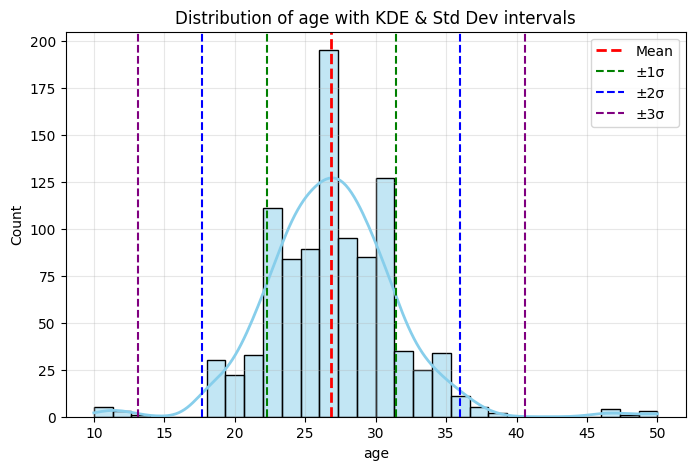

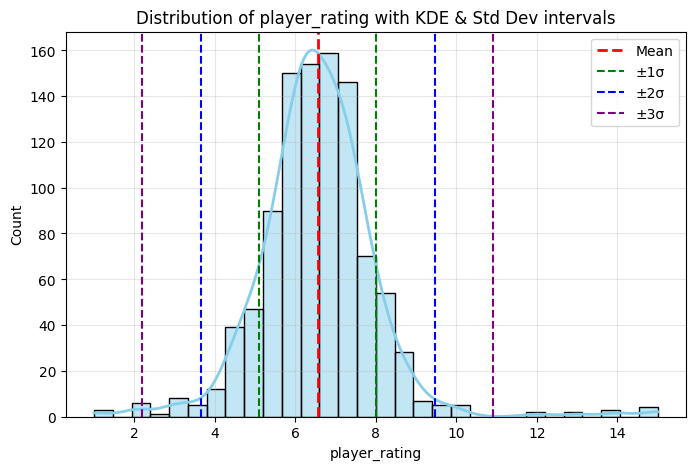

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Task 4: Visualizations ----

def plot_distribution_with_std(data, column):
    mean = data[column].mean()
    std  = data[column].std()
    
    plt.figure(figsize=(8,5))
    sns.histplot(
    data[column],
    bins=30,
    kde=True,
    color="skyblue",
    edgecolor="black",
    line_kws={'color':'red', 'linewidth':2}   # <-- use line_kws instead of kde_kws
)
    
    # Mean line
    plt.axvline(mean, color="red", linestyle="--", linewidth=2, label="Mean")
    
    # ±1σ lines
    plt.axvline(mean-std, color="green", linestyle="--", linewidth=1.5, label="±1σ")
    plt.axvline(mean+std, color="green", linestyle="--", linewidth=1.5)
    
    # ±2σ lines
    plt.axvline(mean-2*std, color="blue", linestyle="--", linewidth=1.5, label="±2σ")
    plt.axvline(mean+2*std, color="blue", linestyle="--", linewidth=1.5)
    
    # ±3σ lines
    plt.axvline(mean-3*std, color="purple", linestyle="--", linewidth=1.5, label="±3σ")
    plt.axvline(mean+3*std, color="purple", linestyle="--", linewidth=1.5)
    
    plt.title(f"Distribution of {column} with KDE & Std Dev intervals")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.legend()
    plt.grid(alpha=0.3)
    plt.show()


# Plot for 'age'
plot_distribution_with_std(df, 'age')

# Plot for 'player_rating'
plot_distribution_with_std(df, 'player_rating')

- **'player_rating'**

## Task5

- Calculate the lower and upper boundaries for the 'Age' and 'Player_Rating' columns. 
- For each column, identify values that fall outside the calculated lower and upper boundaries. These values are considered outliers.

- **Display age outliers**

In [19]:
# -------- Task 5: Outlier boundaries + lists (age, player_rating) --------

num_cols = ["age", "player_rating"]

def iqr_bounds(s):
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return lower, upper

def z3_bounds(s):
    mu, sigma = s.mean(), s.std(ddof=1)
    lower = mu - 3*sigma
    upper = mu + 3*sigma
    return lower, upper

summary = []

for col in num_cols:
    # ---- IQR method ----
    iqr_lo, iqr_hi = iqr_bounds(df[col])
    out_iqr = df[(df[col] < iqr_lo) | (df[col] > iqr_hi)]

    # ---- Z-score (±3σ) method ----
    z3_lo, z3_hi = z3_bounds(df[col])
    out_z3 = df[(df[col] < z3_lo) | (df[col] > z3_hi)]

    # ---- Union (flagged by either) ----
    out_union = df.index.isin(out_iqr.index) | df.index.isin(out_z3.index)
    out_both = df[out_union]

    # Collect quick stats
    summary.append({
        "column": col,
        "IQR_lower": round(iqr_lo, 3), "IQR_upper": round(iqr_hi, 3),
        "IQR_outliers": len(out_iqr),
        "Z3_lower": round(z3_lo, 3),  "Z3_upper": round(z3_hi, 3),
        "Z3_outliers": len(out_z3),
        "Union_outliers": len(out_both)
    })

    # ---- Print & display ----
    print(f"\n=== {col.upper()} ===")
    print(f"IQR bounds: [{iqr_lo:.3f}, {iqr_hi:.3f}]  |  outliers: {len(out_iqr)}")
    print(f"±3σ bounds: [{z3_lo:.3f}, {z3_hi:.3f}]  |  outliers: {len(out_z3)}")
    print("Top IQR outliers:")
    display(out_iqr[[col]].sort_values(col).head(10))
    print("Top ±3σ outliers:")
    display(out_z3[[col]].sort_values(col).head(10))

# Compact summary table
pd.DataFrame(summary)


=== AGE ===
IQR bounds: [16.500, 36.500]  |  outliers: 24
±3σ bounds: [13.129, 40.579]  |  outliers: 17
Top IQR outliers:


,age
207,10
66,11
795,11
966,11
376,11
955,12
922,12
647,12
992,13
689,37


Top ±3σ outliers:


,age
207,10
66,11
795,11
376,11
966,11
955,12
922,12
647,12
992,13
841,46



=== PLAYER_RATING ===
IQR bounds: [3.550, 9.550]  |  outliers: 39
±3σ bounds: [2.192, 10.918]  |  outliers: 19
Top IQR outliers:


,player_rating
881,1.0
649,1.0
194,1.0
687,2.0
297,2.0
32,2.0
96,2.0
116,2.1
959,2.3
102,2.7


Top ±3σ outliers:


,player_rating
194,1.0
649,1.0
881,1.0
32,2.0
687,2.0
96,2.0
297,2.0
116,2.1
456,12.0
985,12.0


,column,IQR_lower,IQR_upper,IQR_outliers,Z3_lower,Z3_upper,Z3_outliers,Union_outliers
0,age,16.50,36.50,24,13.129,40.579,17,24
1,player_rating,3.55,9.55,39,2.192,10.918,19,39


- **Display player_rating outliers**

## Task6

-  Remove outliers from both the 'age' and 'player_rating' columns and then visualize the adjusted data using histogram plots.


Original dataset size: 1000 rows
After removing outliers: 937 rows


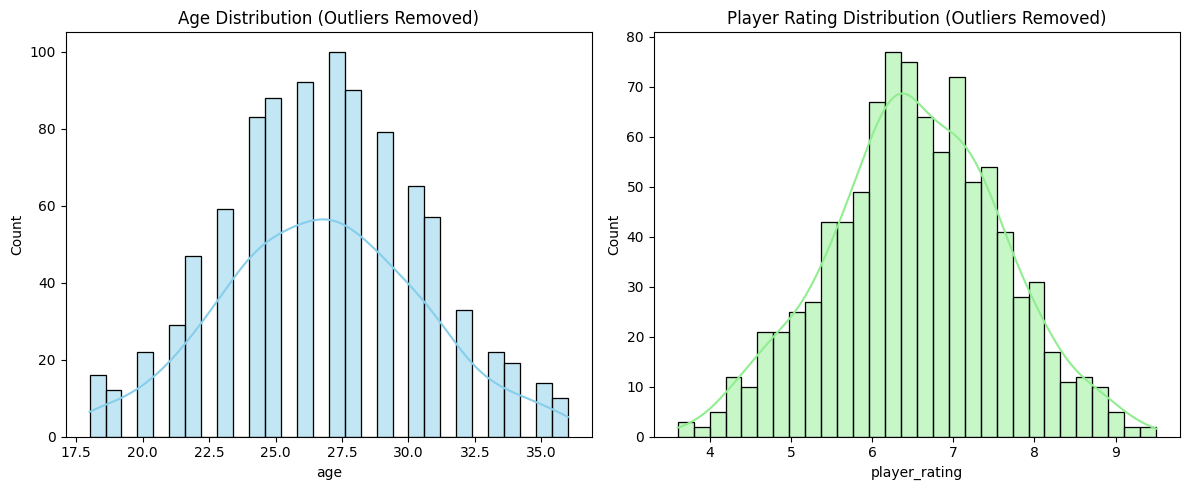

In [20]:
# -------- Task 6: Remove outliers + visualize --------

def remove_outliers_iqr(data, col):
    q1, q3 = data[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    return data[(data[col] >= lower) & (data[col] <= upper)]

# Copy original DF
df_clean = df.copy()

# Remove outliers for age
df_clean = remove_outliers_iqr(df_clean, 'age')

# Remove outliers for player_rating
df_clean = remove_outliers_iqr(df_clean, 'player_rating')

print(f"Original dataset size: {df.shape[0]} rows")
print(f"After removing outliers: {df_clean.shape[0]} rows")

# ---- Visualize adjusted histograms ----
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df_clean['age'], bins=30, kde=True, color="skyblue", ax=axes[0], edgecolor="black")
axes[0].set_title("Age Distribution (Outliers Removed)")

sns.histplot(df_clean['player_rating'], bins=30, kde=True, color="lightgreen", ax=axes[1], edgecolor="black")
axes[1].set_title("Player Rating Distribution (Outliers Removed)")

plt.tight_layout()
plt.show()

- **plot the histograms**